In [1]:
import numpy as np
from data_cube_analysis import getdata, rms, masks, moments
from astropy import units as u 
from astropy.io import fits
import matplotlib.pyplot as plt
import spectral_cube
import aplpy
from math import ceil
import pyspeckit
import colorcet
import matplotlib as mpl

plt.style.use('paper')

In [16]:
inputfile1_rgb = '/Users/abarnes/Dropbox/work/Smallprojects/ppVII/review/cover/data_regrid/hershel8.fits'
inputfile2_rgb = '/Users/abarnes/Dropbox/work/Smallprojects/ppVII/review/cover/rgb_final_uncropped.jpeg'
hdu_rgb = fits.open(inputfile1_rgb)[0]

# inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.rebin.K.kms.0.5kmschannel.galactic.max.fits'
# hdu_max = fits.open(inputfile_max)[0]

inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/datareduction_cont/data/raw/SgrB2_5pass_1_.0.2_10mJy_10mJy_w_session5_final_smooth4_PlanckCombined_10feb2020.fits'
hdu_max = fits.open(inputfile_max)[0]
hdu_max.data = hdu_max.data*1e3

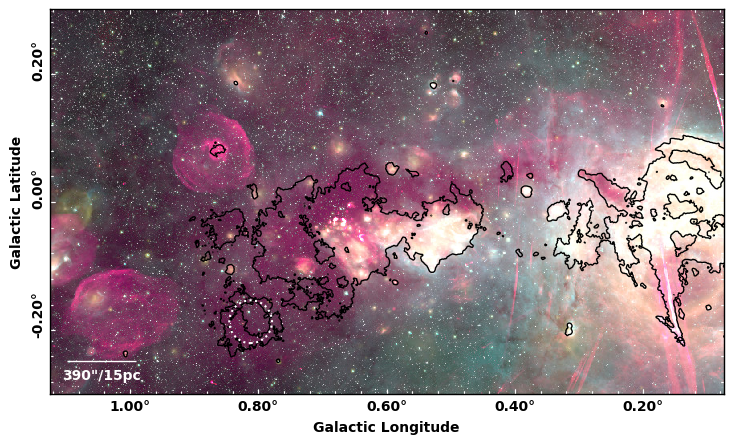

In [21]:
fig = plt.figure(figsize=(10, 5)) 

ax = aplpy.FITSFigure(inputfile1_rgb, figure=fig, subplots=(1,2,2))
ax.show_rgb(inputfile2_rgb)

ax.recenter(0.6, 0.0, width=1.05, height=0.6)
ax.tick_labels.set_xformat('dd.dd')
ax.tick_labels.set_yformat('dd.dd')

ax.show_ellipses(0.8119, -0.1868, 240/3600, 240/3600, edgecolor='white', linestyles='dotted', linewidths=1.5, zorder=10)
ax.add_scalebar(390*u.arcsec, corner='bottom left', color='white')
ax.scalebar.set_label('390"/15pc')

ax.show_contour(hdu_max, levels=[25], colors='black', linewidths=1, smooth=3, convention='wells')
# ax.show_contour(hdu_max, levels=[3], colors='black', linewidths=1, smooth=5)

# # adding labels of interesting things
# im.add_label(1, -0.08, 'Sgr D SNR', color='white')
# im.add_label(0.9, 0.16, 'SNR 0.9+0.1', color='white')
# im.add_label(0.55, 0.11, 'SNR 0.3+0.0', color='white')
# im.add_label(0.5, -0.12, 'Sgr B1', color='white')
# im.add_label(0.72, 0.00, 'Sgr B2', color='white')
# im.add_label(0.28, 0.08, 'Brick', color='white')
# im.add_label(0.81, -0.25, 'Bubble', color='white')
# im.add_label(0.24, 0.2, 'Non-thermal \n filaments', color='white')

for i, ax in enumerate(fig.get_axes()):
    if i in [0,3,6]:
        axes = fig.get_axes()
        ra_ = axes[i].coords[0]
        dec_ = axes[i].coords[1]
        dec_.ticklabels.set_rotation(90)

fig.savefig('../figures/cmz_rgb.pdf')